# Assignment Instruction

This is part 1 of assignment 2. It amounts to 50 percent of the grade.

In this part of the assignment, you will **visually** explore the data from the past two presidential elections in the US with the other data, which you used in the previous assignment. 

The datasets we will use are:

1. County-level vote percentage for Donald Trump 
    - pct_2016: Trump Vote in 2016
        - source: https://www.kaggle.com/stevepalley/2016uspresidentialvotebycounty
    - pct_2020: Trump Vote in 2020
        - source: https://www.kaggle.com/unanimad/us-election-2020
        - These are temporary data, and may not be accurate
2. Covid data as of 1 October, 2020
3. County demography
    - This is the subset of the one you used in Assignment 1
    - https://www.kaggle.com/muonneutrino/us-census-demographic-data

The covid dataset is:

1. At the county level
2. Including deaths and case figures
3. On 1 Oct 2020.

"This dataset contains daily updated number of reported cases & deaths in the US on the state and county level, as provided by the Johns Hopkins University." It is downloaded from https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics

The data files are found in `Part1-Data` directory of this repository. You can download the files, and upload on Colab or google drive.

Note: These three datasets should be combined `fips` field. 




# Import packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read three data files and merge (5 percent)

- Also, create a variable (named `pct_diff`) that measures the difference in vote percentage from 2016 to 2019

In [22]:
#importing covid data
covid_file = pd.read_csv(r"/covid_us_county.csv.zip")
covid_file.head()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [23]:
#importing county data 
county_file = pd.read_csv(r"/acs2017_county_data.csv")
county_file.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [24]:
#importing Trump 2016 and 2020 vote data 
Trumpvote = pd.read_csv(r"/data_pres_2020.csv")
Trumpvote.head()

,st,county,state,fips,pct_2016,pct_2020,Region
0,AL,Autauga,Alabama,1001,0.734358,0.715077,South
1,AL,Baldwin,Alabama,1003,0.773515,0.762357,South
2,AL,Barbour,Alabama,1005,0.522714,0.536005,South
3,AL,Bibb,Alabama,1007,0.769662,0.784289,South
4,AL,Blount,Alabama,1009,0.898519,0.895699,South


In [25]:
#merging covid data frame with county dataframe 

covid_file.rename(columns = {'fips':'CountyId'}, inplace = True) 

df_merge = pd.merge(covid_file, county_file, on = "CountyId") 

df_merge.drop("State", inplace = True, axis = 1) 
df_merge.drop("County", inplace = True, axis = 1)

df_merge

,CountyId,county,state,lat,long,date,cases,state_code,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882275,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-17,88,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2
882276,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-18,93,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2
882277,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-19,99,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2
882278,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-20,101,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2


In [26]:
#merging the merged dataframe with the Trump dataframe

Trumpvote.rename(columns = {'fips':'CountyId'}, inplace = True)

Trumpvote.drop("state", inplace = True, axis = 1)
Trumpvote.drop("county", inplace = True, axis = 1)


df_merge_final = pd.merge(df_merge, Trumpvote, on = "CountyId")


df_merge_final

,CountyId,county,state,lat,long,date,cases,state_code,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,st,pct_2016,pct_2020,Region
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852409,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-17,88,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2,WY,0.869226,0.877188,West
852410,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-18,93,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2,WY,0.869226,0.877188,West
852411,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-19,99,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2,WY,0.869226,0.877188,West
852412,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-20,101,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2,WY,0.869226,0.877188,West


In [27]:
#creating a column with percentage difference of Trump 2020 vote compared with Trump 2016 vote 

df_merge_final["pct_diff"] =  df_merge_final["pct_2020"] - df_merge_final["pct_2016"]

df_merge_final

,CountyId,county,state,lat,long,date,cases,state_code,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,st,pct_2016,pct_2020,Region,pct_diff
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South,-0.019281
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South,-0.019281
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South,-0.019281
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South,-0.019281
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,AL,0.734358,0.715077,South,-0.019281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852409,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-17,88,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2,WY,0.869226,0.877188,West,0.007962
852410,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-18,93,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2,WY,0.869226,0.877188,West,0.007962
852411,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-19,99,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2,WY,0.869226,0.877188,West,0.007962
852412,56045.0,Weston,Wyoming,43.839612,-104.567488,2020-10-20,101,WY,0,7117,3756,3361,1.4,91.6,0.5,0.1,4.3,0.0,5510,59605,7853,30955,2609,14.4,24.1,32.0,15.0,15.8,17.9,19.3,72.7,6.7,9.1,3.0,1.6,6.9,25.7,3407,68.2,21.9,8.8,1.1,2.2,WY,0.869226,0.877188,West,0.007962


# Visual Exploration



## Presidential votes (10 percent)



### Plot `pct_2016` and `pct_2020`

- Explore the relation between two variables through visualisation (and correlation). What do you find?

In [28]:
#correlation between pct_2016 and pct_2020

df_merge_final.loc[:, ["pct_2016", "pct_2020"]].corr()

,pct_2016,pct_2020
pct_2016,1.000000,0.979292
pct_2020,0.979292,1.000000


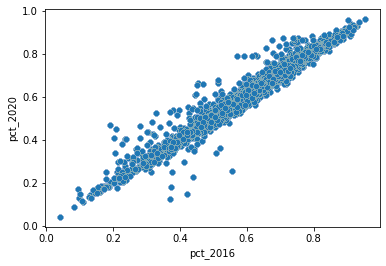

In [29]:
#scatterplot of pct_2016 and pct_2020

sns.scatterplot(x = 'pct_2016', y = 'pct_2020', data = df_merge_final, alpha = .05)

### Distribution of `pct_diff`

- Plot the distribution of `pct_diff`
- Also, create a density plot by `Region`
- Anything interesting?

In [ ]:
sns.kdeplot(x = 'pct_2016', y = 'pct_2020', data = df_merge_final, fill = True, alpha = .7)

In [ ]:
sns.kdeplot(x = 'pct_2016', y = 'pct_2020', data = df_merge_final, hue = "Region", fill = True, alpha = .7)

## Explore the vote change (20 percent)

- Suppose that you are interested in the relationship between `pct_diff` and following variables, `cases`, `deaths`, `Hispanic`, `White`, `Black`, `Income`, ( and maybe `pct_2016`, `pct_2020`)
- Explore the relationships through correlation analysis and visualisation. What do you find? For example:
    - What do you think is the strong determinant of the change in Trump vote percentage from 2016 to 2020?
    - The covid cases/deaths (per 1000) has any meaningful association with vote change?
    - What do you find about the race/ethnicity or income?

In [75]:
#correlation of concerned variables 

df_merge_final["cases_per_1000"] =  df_merge_final["cases"] / (df_merge_final["TotalPop"] / 1000)  
df_merge_final["deaths_per_1000"] =  df_merge_final["deaths"] / (df_merge_final["TotalPop"] / 1000)  

corr_tab = df_merge_final.loc[:, ["pct_diff", "Hispanic", "White", "Black", "Income", "cases_per_1000", "deaths_per_1000" ]].corr()
corr_tab

,pct_diff,Hispanic,White,Black,Income,cases_per_1000,deaths_per_1000
pct_diff,1.000000,0.211491,-0.031210,-0.118706,-0.229016,-0.010823,-0.031702
Hispanic,0.211491,1.000000,-0.616611,-0.115397,0.044975,0.113894,0.075653
White,-0.031210,-0.616611,1.000000,-0.618109,0.129349,-0.264006,-0.286343
Black,-0.118706,-0.115397,-0.618109,1.000000,-0.271605,0.241193,0.304888
Income,-0.229016,0.044975,0.129349,-0.271605,1.000000,-0.057858,-0.024871
cases_per_1000,-0.010823,0.113894,-0.264006,0.241193,-0.057858,1.000000,0.660704
deaths_per_1000,-0.031702,0.075653,-0.286343,0.304888,-0.024871,0.660704,1.000000


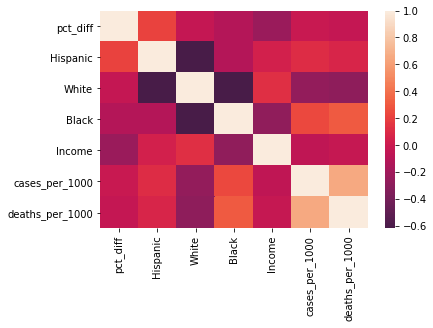

In [80]:
sns.heatmap(corr_tab, cmap = "rocket", center = 0)

## Plot the election map (15 percent)

In this question, you are asked to plot `pct_diff` on a map of counties. The shapefile is available in `cb_2018_us_county_5m.zip`.

- In this exercise:
  - You need to install `geopandas`
  - You need to decompress the zip file
  - You have to use a meaningful color scheme
- Do you find anything interesting?

Note: 

- Merging shapefile data and vote data is tricky
  1. The `GEOID` in the map data is `fips` code in the election dataset
  2. However, these two cannot be directly merged because of type mismatch (The type of `GEOID` is object, and `fips` is `int`. So, before you merge the datasets, you need to change the type of variable (c.f. `.astype()`).


In [32]:
!pip install geopandas

     |████████████████████████████████| 972kB 5.7MB/s 
     |████████████████████████████████| 14.8MB 304kB/s 
     |████████████████████████████████| 6.5MB 41.3MB/s 


In [33]:
import geopandas as gpd

In [45]:
!unzip /cb_2018_us_county_5m.zip -d /data

Archive:  /cb_2018_us_county_5m.zip
  inflating: /data/cb_2018_us_county_5m.shp.ea.iso.xml  
  inflating: /data/cb_2018_us_county_5m.shp.iso.xml  
  inflating: /data/cb_2018_us_county_5m.shp  
  inflating: /data/cb_2018_us_county_5m.shx  
  inflating: /data/cb_2018_us_county_5m.dbf  
  inflating: /data/cb_2018_us_county_5m.prj  
 extracting: /data/cb_2018_us_county_5m.cpg  


In [47]:
df_map = gpd.read_file("/data/cb_2018_us_county_5m.shp")

In [48]:
df_map.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."


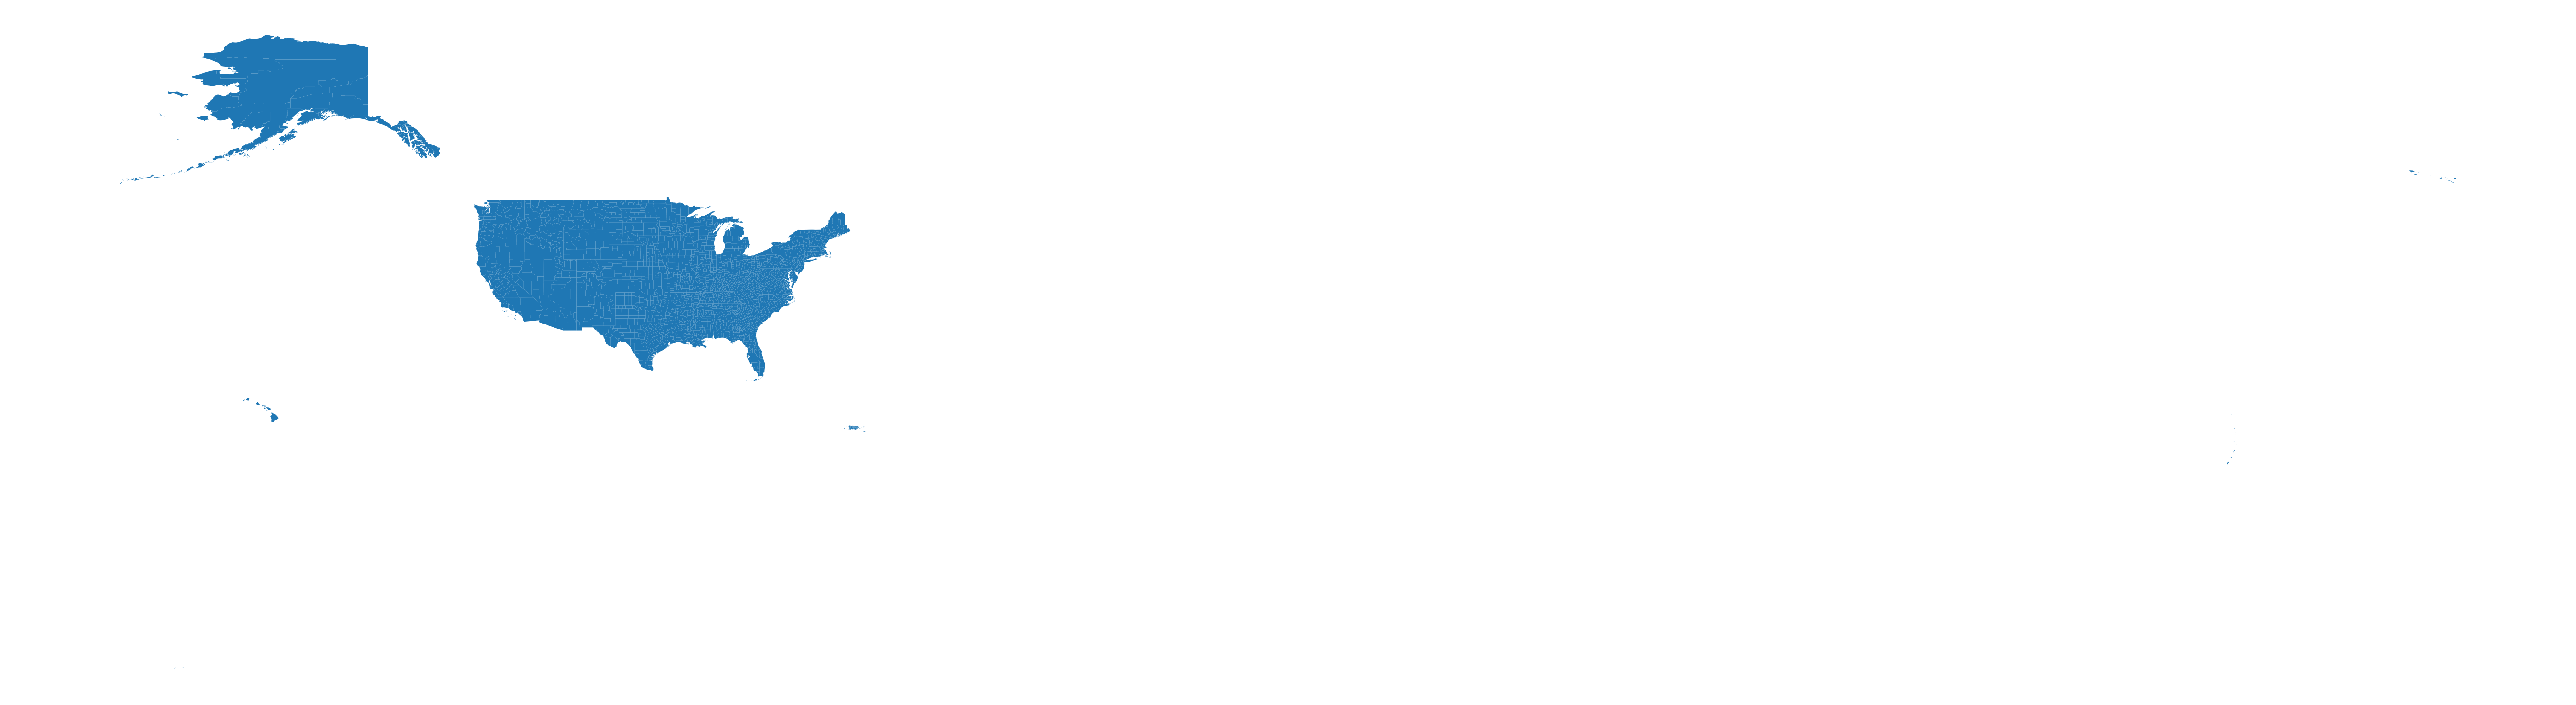

In [57]:
fig, ax = plt.subplots(1, figsize =(100,100))
df_map.plot(ax = ax, edgecolor = "none").set_axis_off()

In [61]:
df_map["GEOID"] = df_map["GEOID"].astype(int)

In [62]:
df_map.rename(columns = {'GEOID':'CountyId'}, inplace = True)

In [63]:
df_polmap = df_map.merge(df_merge_final, on = "CountyId") 

In [64]:
df_polmap.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,CountyId,NAME,LSAD,ALAND,AWATER,geometry,county,state,lat,long,date,cases,state_code,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,st,pct_2016,pct_2020,Region,pct_diff,cases_per_1000,deaths_per_1000
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247...",Highland,Ohio,39.183926,-83.603315,2020-01-22,0,OH,0,43031,21262,21769,0.9,95.5,1.2,0.2,0.4,0.0,32478,42333,2216,22079,1143,21.6,32.4,27.4,15.4,19.4,12.0,25.7,81.4,11.1,0.5,2.2,0.9,3.9,29.2,17468,78.3,11.9,9.6,0.2,7.3,OH,0.762846,0.796197,Midwest,0.033351,0.0,0.0
1,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247...",Highland,Ohio,39.183926,-83.603315,2020-01-23,0,OH,0,43031,21262,21769,0.9,95.5,1.2,0.2,0.4,0.0,32478,42333,2216,22079,1143,21.6,32.4,27.4,15.4,19.4,12.0,25.7,81.4,11.1,0.5,2.2,0.9,3.9,29.2,17468,78.3,11.9,9.6,0.2,7.3,OH,0.762846,0.796197,Midwest,0.033351,0.0,0.0
2,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247...",Highland,Ohio,39.183926,-83.603315,2020-01-24,0,OH,0,43031,21262,21769,0.9,95.5,1.2,0.2,0.4,0.0,32478,42333,2216,22079,1143,21.6,32.4,27.4,15.4,19.4,12.0,25.7,81.4,11.1,0.5,2.2,0.9,3.9,29.2,17468,78.3,11.9,9.6,0.2,7.3,OH,0.762846,0.796197,Midwest,0.033351,0.0,0.0
3,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247...",Highland,Ohio,39.183926,-83.603315,2020-01-25,0,OH,0,43031,21262,21769,0.9,95.5,1.2,0.2,0.4,0.0,32478,42333,2216,22079,1143,21.6,32.4,27.4,15.4,19.4,12.0,25.7,81.4,11.1,0.5,2.2,0.9,3.9,29.2,17468,78.3,11.9,9.6,0.2,7.3,OH,0.762846,0.796197,Midwest,0.033351,0.0,0.0
4,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247...",Highland,Ohio,39.183926,-83.603315,2020-01-26,0,OH,0,43031,21262,21769,0.9,95.5,1.2,0.2,0.4,0.0,32478,42333,2216,22079,1143,21.6,32.4,27.4,15.4,19.4,12.0,25.7,81.4,11.1,0.5,2.2,0.9,3.9,29.2,17468,78.3,11.9,9.6,0.2,7.3,OH,0.762846,0.796197,Midwest,0.033351,0.0,0.0


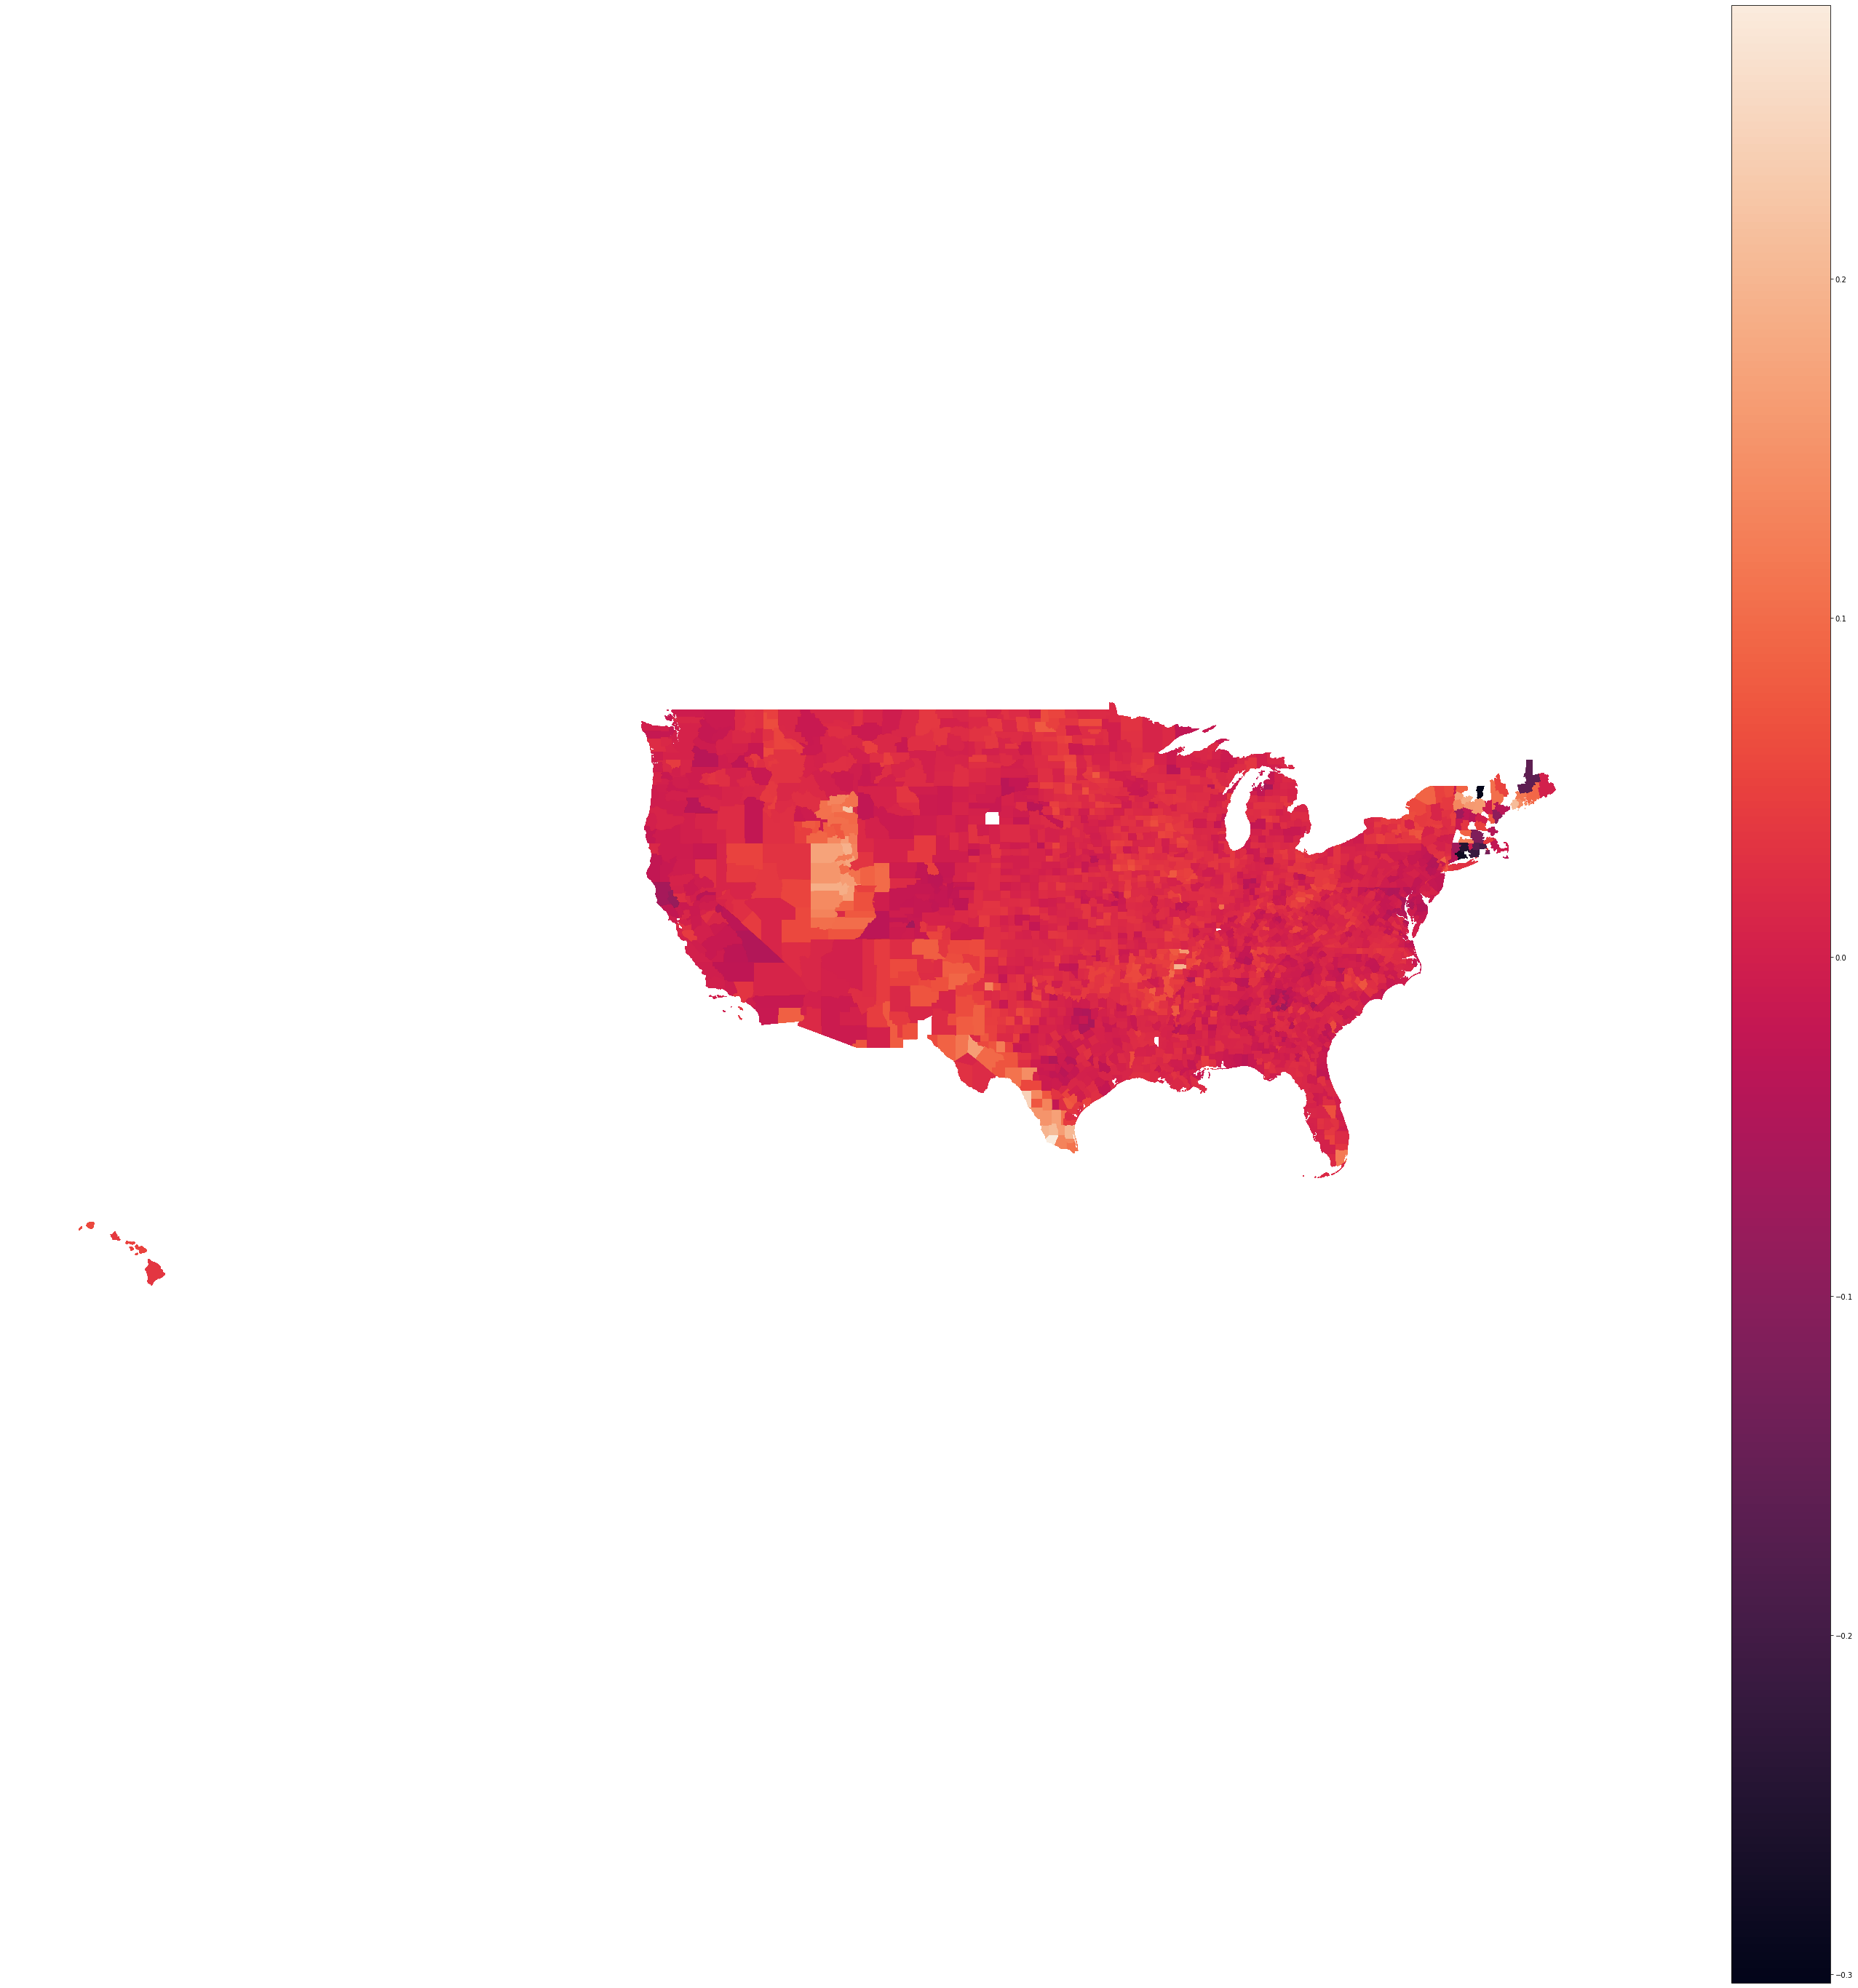

In [73]:
fig, ax = plt.subplots(1,1, figsize = (50, 50))
df_polmap.plot(ax = ax, edgecolor = "none", column = "pct_diff", cmap = "rocket",  legend = True).set_axis_off()